# **Setting up YOLOv5 and installing dependencies**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15965, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 15965 (delta 82), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15965/15965), 14.60 MiB | 21.93 MiB/s, done.
Resolving deltas: 100% (10955/10955), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
! python -m pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Load the Model**

In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/models/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-6-4 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7270791 parameters, 0 gradients
Adding AutoShape... 


# **Implement Intel Extension For Pytorch (IPEX)**

In [ ]:
!pip install intel_extension_for_pytorch
import torch
import intel_extension_for_pytorch as ipex

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

model,optimizer = ipex.optimize(model, optimizer=optimizer)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 MB 10.8 MB/s eta 0:00:00


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


# **Running YOLOv5 object detection on an image**

In [ ]:
import torch
import matplotlib.pyplot as plt
# Loading in yolov5s - you can switch to larger models such as yolov5m or yolov5l, or smaller such as yolov5n
img = '/content/images/night.jpg'  # or file, Path, PIL, OpenCV, numpy, list
results = model(img)
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(results.render()[0])
plt.show()

# **Print the Results**

In [ ]:
results.save(save_dir='results')
print(results)

Saved 1 image to results4


image 1/1: 720x1280 8 cars, 2 traffic signs
Speed: 25.2ms pre-process, 204.5ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


# **Output**

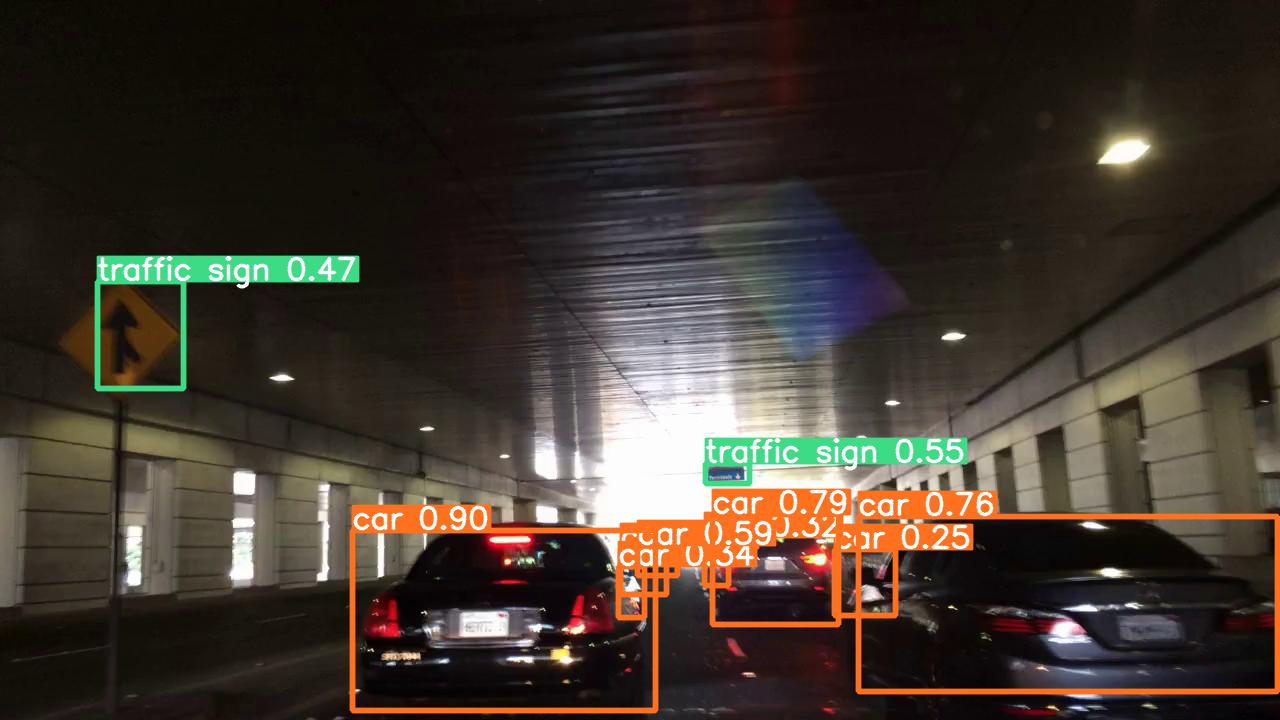

# **Analysis**

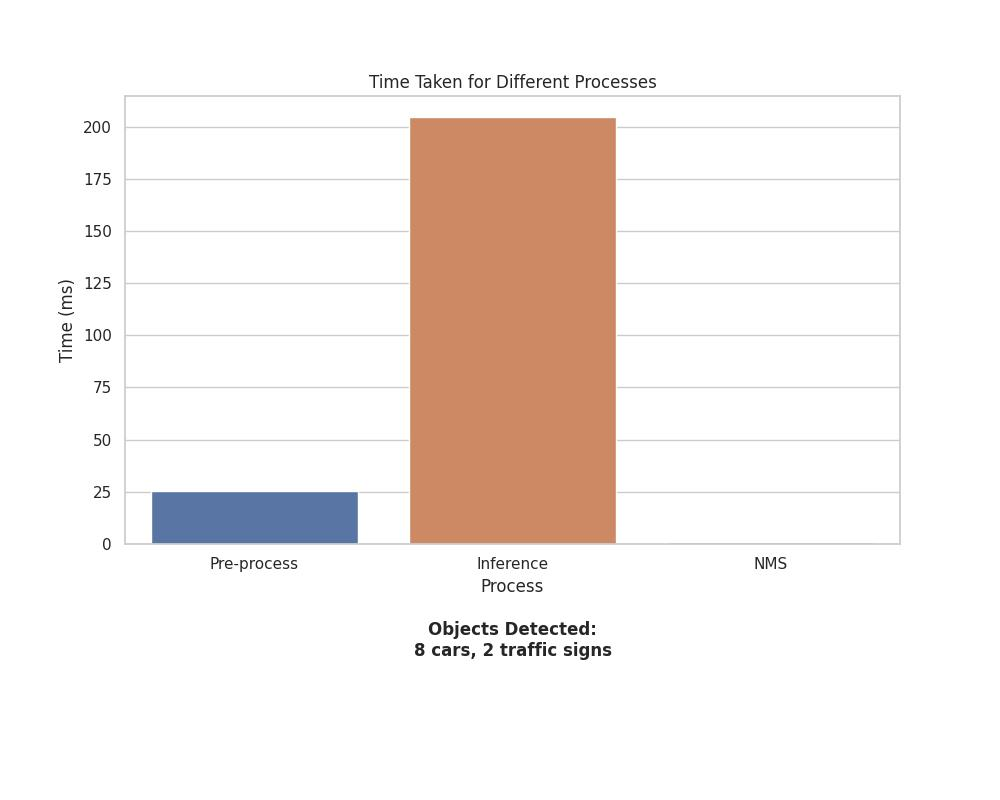

# **Benchmark**

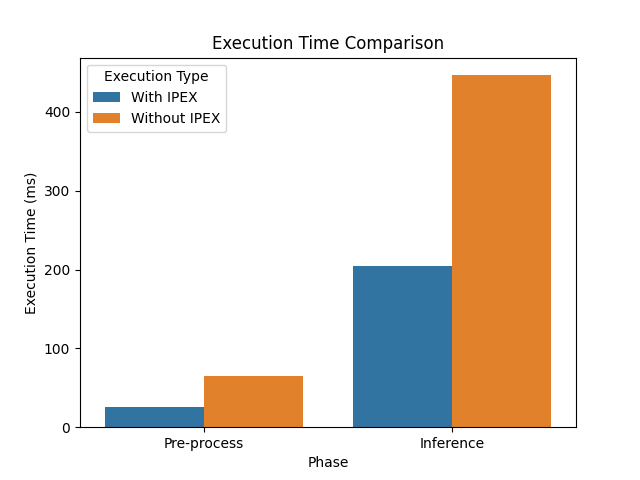